# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

# Q1

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

### Q1: Answers in eda_q1.pdf

# Q2

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

### 2.1

In [24]:
import pandas as pd
import numpy as np
file_path = "./data/airbnb_hw.csv"
airbnb_df = pd.read_csv(file_path)

### 2.2
30,478 rows and 13 columns, which means there are 30k observations and the variables included are: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating']

In [25]:
print(airbnb_df.shape)
print(airbnb_df.columns)

airbnb_df.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


### 2.3

For the most part, it seems like the rentals available are for day to day living, not for exotic excursions but there definitely still are some rentals that would fall under that category such as castles or treehouses. On another note, private rooms were more popular in bed & breakfast, Dorm, Huts, and Other property types.

In [26]:
crosstab = pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])
print(crosstab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

### 2.4.
 For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
</br>
The data is badly scaled and there are many outliers as it seems.

### clean the price

In [27]:
# airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], downcast='float', errors='coerce')
airbnb_df['Price'] = airbnb_df['Price'].str.replace(',', '')
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], downcast='float')

# have to cast this from object to float otherwise describe doesn't show proper stats
airbnb_df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785461
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: >

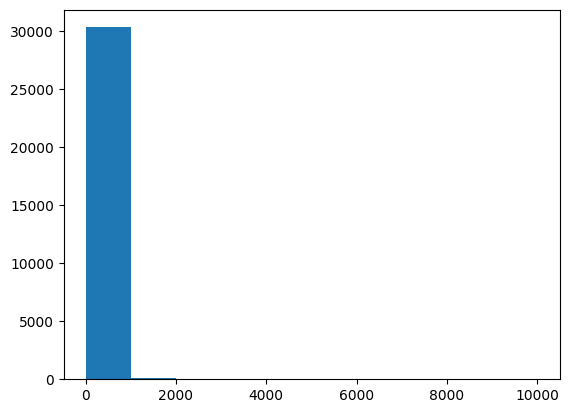

In [28]:
airbnb_df['Price'].hist(grid=False)

<Axes: >

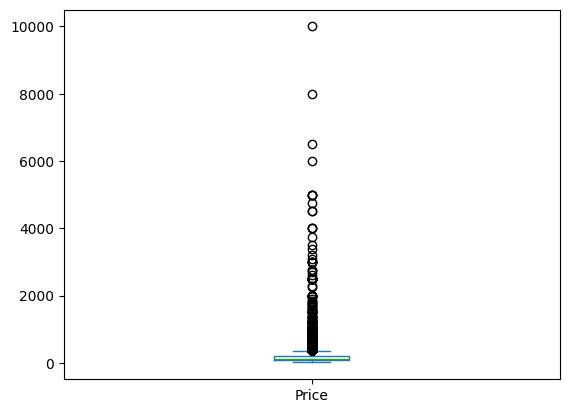

In [29]:
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')
airbnb_df['Price'].plot.box()

<Axes: ylabel='Density'>

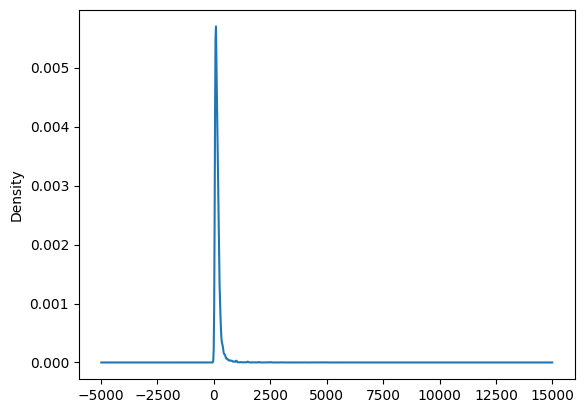

In [30]:
airbnb_df['Price'].plot.density()

#### price log

In [31]:
airbnb_df['price_log'] = np.log(airbnb_df['Price'])

<Axes: >

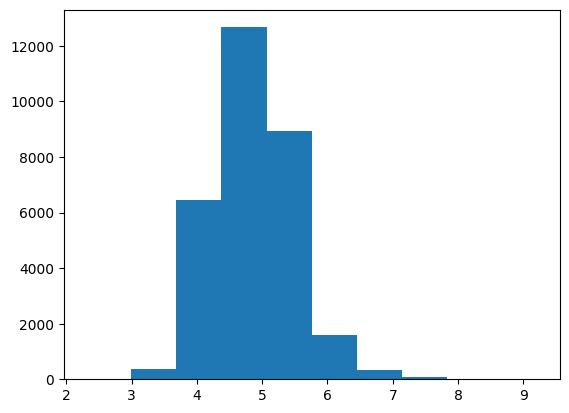

In [32]:
airbnb_df['price_log'].hist(grid=False)

<Axes: >

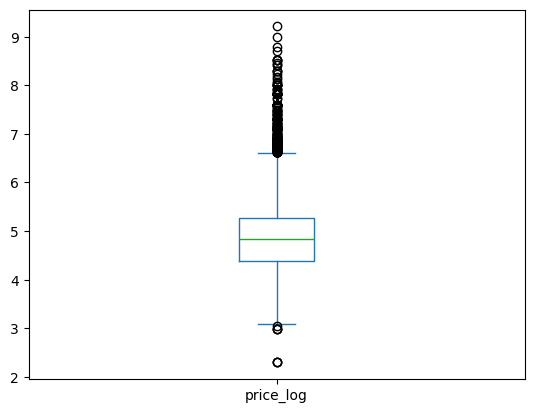

In [33]:
airbnb_df['price_log'] = pd.to_numeric(airbnb_df['price_log'], errors='coerce')
airbnb_df['price_log'].plot.box()

<Axes: ylabel='Density'>

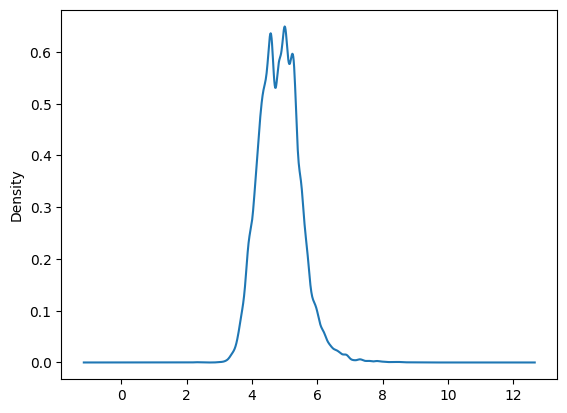

In [34]:
airbnb_df['price_log'].plot.density()

### 2.5. 
Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='price_log'>

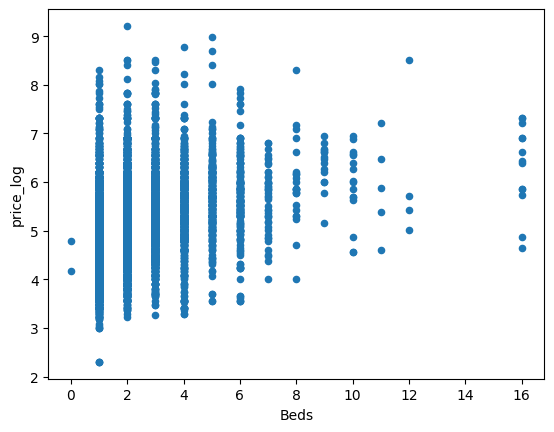

In [35]:
airbnb_df.plot.scatter(y='price_log',x='Beds')

In [36]:
var = 'Price'
group = 'Beds'
airbnb_df.loc[:,[group,var]].groupby(group).describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183765   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673813   107.047829   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061264   225.706329   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118286   303.106934   26.0  140.00  200.0   300.00   
4.0     783.0   315.332062   353.184387   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610657   35.0  189.75  290.0   450.00   
6.0     177.0   401.768372   417.018433   35.0  199.00  275.0   425.00   
7.0      45.0   341.377777   220.116638   55.0  177.00  300.0   445.00   
8.0      24.0   589.041687   793.054932   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649612  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820526   95.0  291.00  407.5   706.25   
11.0      5.0   535.799988   499.217590  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285156  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804291  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

For the scatterplot, it seems like there's a good bit of grouping for having just 1-4 beds, which means that there isn't a large increase in prices associated with a smaller increase in beds. Despite that, there are higher prices for having 5 to 6 beds and there is also more variability. Now for 10+ beds, there are definitely some outliers with insanely high prices. 
</br> </br>
For the grouped statistics, mean prices increase with the number of beds and standard deviation also increases with price, which is supported by the fact that the more beds there are, the smaller sample sizes there are for that specific number of beds so the averages get less reliable with more beds in the property.

### 2.6. 
Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

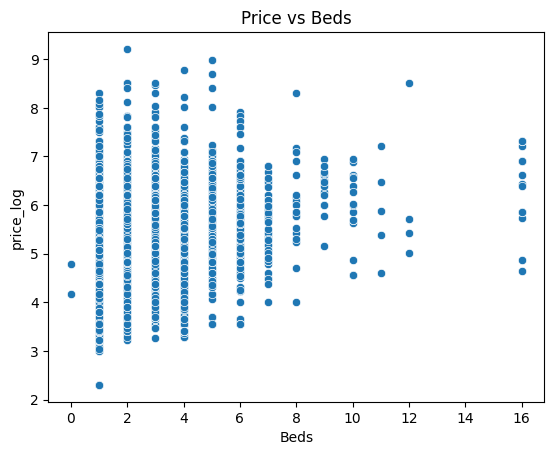

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
var1 = 'Beds' # A numeric variable
var2 = 'price_log' # Another numeric
cat1 = 'Room Type' # A categorical variable
cat2 = 'Property Type' # A categorical variable

sns.scatterplot(data=airbnb_df, x=var1, y=var2).set(title='Price vs Beds')
plt.show() # Our initial plot

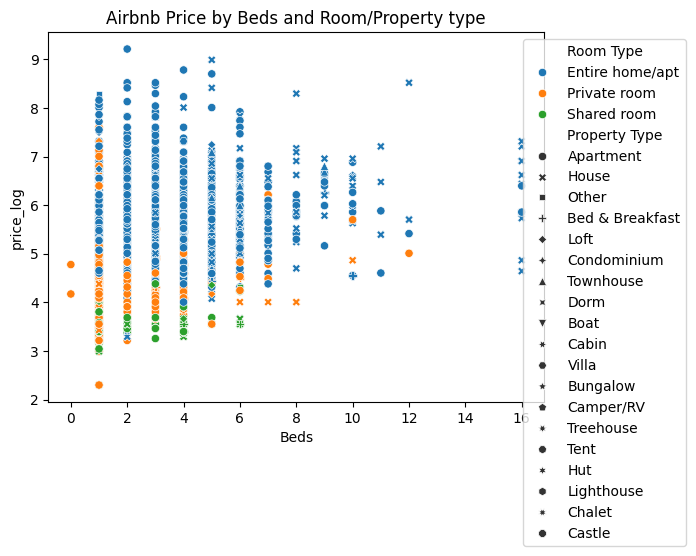

In [38]:
this_plot = sns.scatterplot(data=airbnb_df, x=var1, y=var2, hue=cat1, style=cat2) # Two kinds of grouping
this_plot.set(title='Airbnb Price by Beds and Room/Property type')
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.3, 1)) # Moves the Legend

In [39]:
airbnb_df.groupby(['Room Type', 'Property Type'])['Price'].describe()

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224838   218.097824   10.0   
                Bed & Breakfast     13.0  184.538467   119.814171   85.0   
                Boat                 7.0  158.428574    51.110523  100.0   
                Bungalow             4.0  150.750000    46.464146   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333336   107.685966   45.0   
                Condominium         72.0  304.861115   266.197510   80.0   
                Dorm                 4.0   44.250000    24.060688   30.0   
                House              752.0  297.263306   468.409424   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510193   321.519714   55.0   
                Other               14.0  843.428589  1133.062256   66.0   
                Townhouse           83.0  280.783142   314.605255   66.0   
                Villa                4.0  529.750000   650.963562  120.0   
Private room    Apartment        10748.0   92.713898    65.237045   10.0   
                Bed & Breakfast    155.0   97.161293    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590912    40.576393   46.0   
                Dorm                16.0   86.562500    40.738136   50.0   
                House             1258.0   77.750397    49.402649   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057693   128.817917   39.0   
                Other               29.0  211.931030   235.404510   39.0   
                Tent                 4.0  126.250000    94.989037   40.0   
                Townhouse           52.0   83.365387    30.578110   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107315   60.0   
Shared room     Apartment          685.0   79.199997    67.720848   20.0   
                Bed & Breakfast     12.0  143.666672   245.328110   30.0   
                Dorm                11.0   73.181816    46.328861   30.0   
                House               80.0   77.487503   275.409943   10.0   
                Loft                49.0   78.816330    87.521828   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666672   114.788208   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

It seems like the room type that has the highest prices on average would be entire home/apt or private room for the most part and property type (while small,) looks to be a mix of apartment, house, and other (mainly other has the highest average). </br> </br>

The highest standard deviation seems to be coming from the rare property types such as castles/villas. </br></br>

I'd say that the median is more reliable here just from looking at the scatterplot and realizing, even with price_log, we have extreme outliers which produces an unreliable mean.

# Q3

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

### 3.1
Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [40]:
drill_path = "./data/drilling_rigs.csv"
drill_df = pd.read_csv(drill_path)
drill_df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [41]:
drill_df.shape

(623, 10)

There are 623 observations and 10 variables. THe numeric variables were not read in corectly by Pandas as there are quite a few entries that are strings such as "Not available" and how I would clean them would be to cast all of those strings to np.nan and convert all of the columns (except the month column) to numeric and handle missing values later by either dropping, filling them, or something else, based on later analysis.

### 3.2. 
To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [42]:
# also cleaning the rest of the df as listed out in 3.1
drill_df = drill_df.replace("Not Available", np.nan)
numeric_cols = drill_df.columns[1:]  # everything except month
drill_df[numeric_cols] = drill_df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [43]:
drill_df['time'] = pd.to_datetime(drill_df['Month'], format='mixed')
drill_df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01


### 3.3. 
Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

[Text(0.5, 1.0, 'Total Active Well Service Count By Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Active Rigs')]

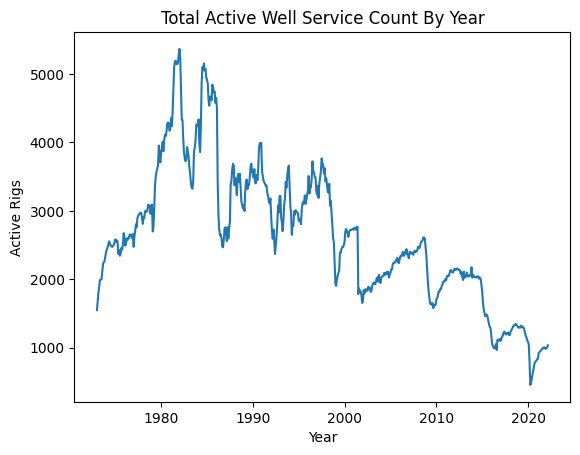

In [44]:
fig = sns.lineplot(data = drill_df, x = 'time', 
                   y = 'Active Well Service Rig Count (Number of Rigs)')
fig.set(title="Total Active Well Service Count By Year", 
        xlabel='Year', ylabel='Active Rigs')

Over time, there is a generall decrease in the number of rigs after an initial spike between the years 1980 and 1990, as more and more active well rigs are put out of service as time goes on.

### 3.4. 
Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

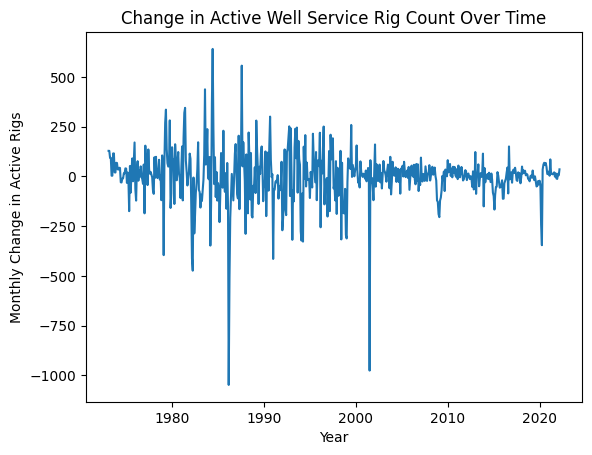

In [45]:
drill_df = drill_df.sort_values('time')
y = drill_df['Active Well Service Rig Count (Number of Rigs)'].to_numpy()
t = len(y)

diff = y[1:] - y[:(t-1)]  # first difference of active rig counts
fig = sns.lineplot(x=drill_df['time'][1:], y=diff)
fig.set(title='Change in Active Well Service Rig Count Over Time',
        xlabel='Year', # adding labels for legibility!
        ylabel='Monthly Change in Active Rigs')
plt.show()

Since we're looking at change over time, we will be plotting the month by month changes and since the first month. Even though there seems to have been a lot of volatility between 1980 and 1990 in the number of active rigs but towards modern day, it's still centered around 0 so it's considered stationary.

### 3.5. 
The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [46]:
# time is the id, value vars are the first two columns.
melted_df = drill_df.melt(
    id_vars=['time'],  
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ]
)

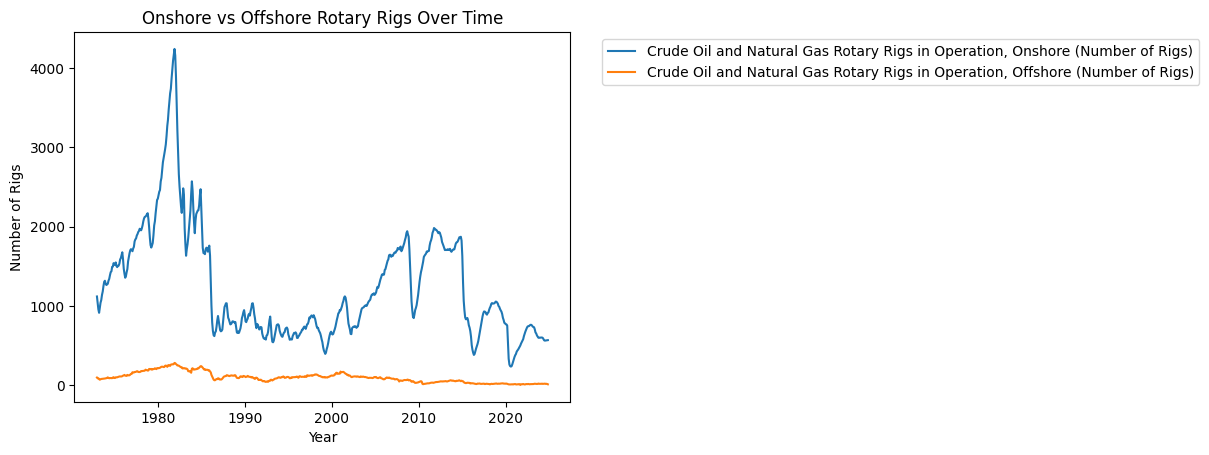

In [47]:
fig = sns.lineplot(data=melted_df,x='time',y='value',hue='variable')
fig.set(title='Onshore vs Offshore Rotary Rigs Over Time',xlabel='Year',ylabel='Number of Rigs')
fig.legend(bbox_to_anchor=(1.05,1))